In [1]:
#Image Segmentation using k means algo
#!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2

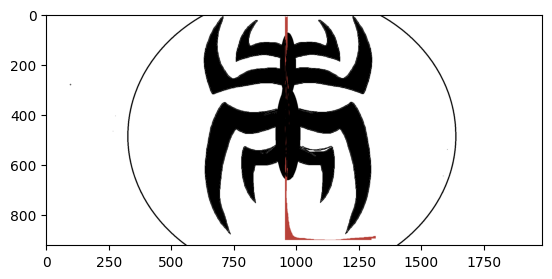

In [3]:
img = cv2.imread(r'C:\Users\himan\Pictures\dr2.png',cv2.IMREAD_UNCHANGED)
plt.imshow(img)


In [4]:
print(img.shape)

(923, 1984, 3)


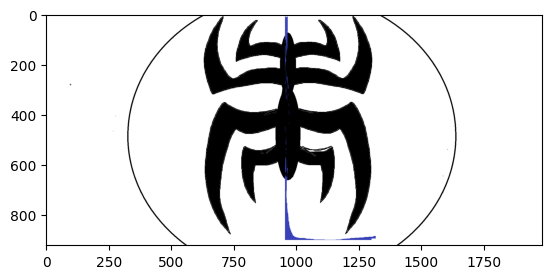

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
#Flattening the image 
#Reshaping the image to a 2D array of pixels and 3 color values(RGB)
pixel_values = img.reshape((-1,3))

pixel_values = np.float32(pixel_values)

In [7]:
print(pixel_values.shape)

(1831232, 3)


In [8]:
#Stopping criteria 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100,0.2)

In [9]:
#Clustering 
#using cv2.kmeans function which takes a 2D array as input 
k=3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria,10, cv2.KMEANS_RANDOM_CENTERS )

In [10]:
#cv2.KMEANS_RANDOM_CENTERS indicates opencv to randomly assign the values of the clusters initially 
centers = np.uint8(centers)

#flatten the labels array 
labels = labels.flatten()

In [11]:
#convert all pixels to the color of the centroids 
segmented_image = centers[labels.flatten()]

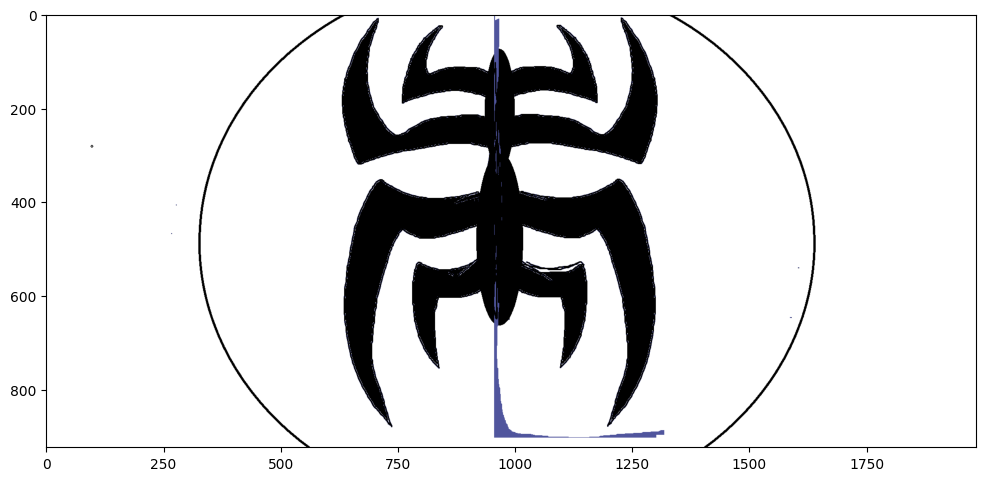

In [12]:
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize=(12,10))
plt.imshow(segmented_image)
plt.show()

In [13]:
# Disable the cluster number 0, 1, and 2 (turning the pixels into black)

import numpy as np

masked_image0 = np.copy(img)
masked_image1 = np.copy(img)
masked_image2 = np.copy(img)

# Convert to the shape of a vector of pixel values

masked_image0 = masked_image0.reshape((-1, 3))
masked_image1 = masked_image1.reshape((-1, 3))
masked_image2 = masked_image2.reshape((-1, 3))

# Disabling Cluster 0
cluster = 0
masked_image0[labels == cluster] = [0, 0, 0]

# Disabling Cluster 1
cluster = 1
masked_image1[labels == cluster] = [0, 0, 0]

# Disabling Cluster 2
cluster = 2
masked_image2[labels == cluster] = [0, 0, 0]

# Convert back to the original shape
masked_image0 = masked_image0.reshape(img.shape)
masked_image1 = masked_image1.reshape(img.shape)
masked_image2 = masked_image2.reshape(img.shape)


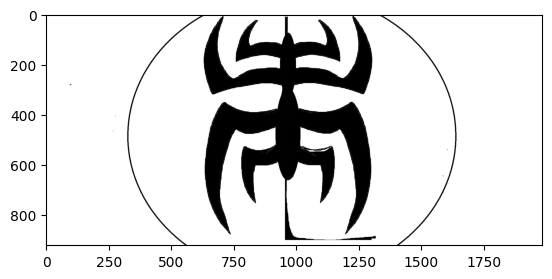

In [14]:
#clustter 0 disabled 
plt.imshow(masked_image0)
plt.show()


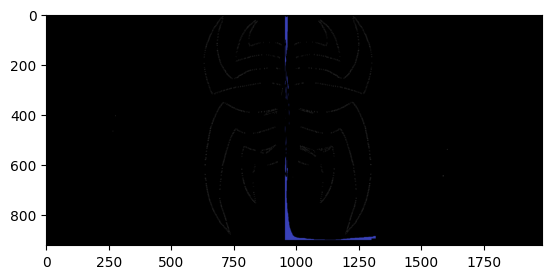

In [15]:
plt.imshow(masked_image1)
plt.show()

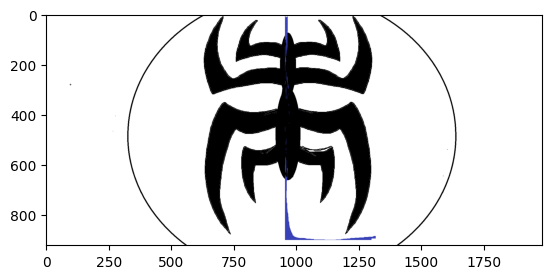

In [16]:
plt.imshow(masked_image2)
plt.show()